In [2]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from scipy import stats
import drms
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import scale, robust_scale
%matplotlib inline

pd.set_option('display.max_column', 50)
pd.set_option('display.max_row', 500)

In [4]:
# all_data = pd.read_csv('~/.flare_prediction_data/data.csv')
all_data = pd.read_csv('Python/data/non_10_thresh_data.csv')
z = np.zeros(all_data.shape[0])
new_cols = pd.DataFrame({'M_count':z, 
                         'M_average_time':z,
                         'M_most_recent':z,
                         'X_count':z, 
                         'X_average_time':z,
                         'X_most_recent':z,
                         'any_count':z, 
                         'any_average_time':z,
                         'any_most_recent':z,
                        })

#print(new_cols.shape, all_data.shape)

In [13]:
all_data.drop(["Unnamed: 0","connected_components_mean_thresh", "total_nodes", "mean_distance", "flare_in_component"], axis = 1, inplace=True)

In [8]:
all_data.loc[all_data['base_url'] == '/SUM91/D1044009471/S00000/']

,Unnamed: 0,HARPNUM,T_REC,NOAA_AR,LAT_FWT,LON_FWT,AREA_ACR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,base_url,X_flare_in_6h,M_flare_in_6h,any_flare_in_6h,X_flare_in_12h,M_flare_in_12h,any_flare_in_12h,X_flare_in_24h,M_flare_in_24h,any_flare_in_24h,X_flare_in_48h,M_flare_in_48h,any_flare_in_48h,hc_x,hc_y,hc_z,closest_dist,connected_components_mean_thresh,total_nodes,mean_distance,flare_in_component,mean_nodes_in_component,mean_connected_components_mean_thresh,mean_total_nodes,mean_mean_distance,mean_flare_in_component,mean_eig_centrality
20494,20494,407,2011-03-06 04:00:00,11169,19.949415,-70.547859,101.357986,5.502136e+21,29.142,89.515,104.7,43.737,-0.222779,5.965078e+12,0.012162,0.00498,342.841,37.511,1.275059e+12,3640.563,3.641593e+22,23.687,8.723,/SUM91/D1044009471/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,-616456.099164,262884.566332,186024.086215,32.486464,1.0,NaN,NaN,NaN,2.0,1.0,6.0,63.564428,False,0.289568


In [11]:
flare_data = pd.read_csv('~/.flare_prediction_data/flare_data.csv')
flare_data.head()

FileNotFoundError: File b'/home/maxine/.flare_prediction_data/flare_data.csv' does not exist

In [10]:
all_data["T_REC"] = all_data["T_REC"].apply(pd.to_datetime)
flare_data["start"] = flare_data["start"].apply(pd.to_datetime)
flare_data["end"] = flare_data["end"].apply(pd.to_datetime)


NameError: name 'flare_data' is not defined

In [9]:
combined = pd.concat([all_data, new_cols], axis=1)
combined.head()

,Unnamed: 0,HARPNUM,T_REC,NOAA_AR,LAT_FWT,LON_FWT,AREA_ACR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,base_url,X_flare_in_6h,...,M_flare_in_48h,any_flare_in_48h,hc_x,hc_y,hc_z,closest_dist,connected_components_mean_thresh,total_nodes,mean_distance,flare_in_component,mean_nodes_in_component,mean_connected_components_mean_thresh,mean_total_nodes,mean_mean_distance,mean_flare_in_component,mean_eig_centrality,M_count,M_average_time,M_most_recent,X_count,X_average_time,X_most_recent,any_count,any_average_time,any_most_recent
0,0,14,2010-05-05 03:12:00,11070,NaN,NaN,0.00000,2.040540e+18,82.474,38.177,27.302,40.210,0.096427,2.450419e+10,0.455411,0.000981,0.094,0.040,5.157960e+10,3116.390,1.696869e+20,49.498,60.976,/SUM89/D1037535115/S00000/,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,14,2010-05-05 04:00:00,11070,20.684654,-1.045460,15.91787,3.406072e+20,56.375,119.260,115.744,77.247,-0.467200,6.131319e+11,-0.043184,-0.014785,28.496,9.625,2.101145e+11,4224.295,3.652143e+21,38.051,30.722,/SUM97/D1037535322/S00000/,0,...,0,0,-11872.018458,287843.714077,633037.462958,20.576242,NaN,NaN,NaN,NaN,4.0,1.0,8.0,62.496910,True,0.391804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,14,2010-05-05 05:00:00,11070,20.507109,-0.913314,25.38142,5.640165e+20,49.561,135.720,135.401,92.320,0.725307,8.604667e+11,-0.027848,-0.012830,46.662,10.816,3.272656e+11,4652.318,5.208463e+21,33.883,20.759,/SUM93/D1037535533/S00000/,0,...,0,0,-10383.617824,285833.795234,633973.658796,20.416992,1.0,NaN,NaN,NaN,4.0,1.0,8.0,62.534442,True,0.391804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,14,2010-05-05 06:00:00,11070,20.496035,-0.419703,31.01844,6.893843e+20,46.385,156.766,156.133,98.326,0.269859,1.099828e+12,-0.027856,-0.014201,61.789,13.406,1.363568e+11,4721.633,5.919388e+21,30.640,14.195,/SUM86/D1037535764/S00000/,0,...,0,0,-4772.177056,285667.229696,634115.792476,20.437609,1.0,NaN,NaN,NaN,3.0,1.0,6.0,65.233606,True,0.509502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,14,2010-05-05 07:00:00,11070,20.480949,0.125770,31.89329,6.563502e+20,44.189,170.519,173.209,106.995,1.141734,9.395849e+11,-0.038013,-0.023795,62.070,18.584,4.772939e+11,5036.524,5.223896e+21,27.010,7.939,/SUM99/D1037536001/S00000/,0,...,0,0,1430.203374,285452.974486,634228.611732,20.351355,1.0,NaN,NaN,NaN,3.0,1.0,6.0,65.239769,True,0.509502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
def reset():
    z = np.zeros(all_data.shape[0])
    cols = ['M_count', 'M_average_time', 'M_most_recent', 'X_count', 'X_average_time', 'X_most_recent', 'any_count', 'any_average_time', 'any_most_recent']
    
    for c in cols:
        combined[c] = z
reset()
combined.head()

,HARPNUM,T_REC,NOAA_AR,LAT_FWT,LON_FWT,AREA_ACR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,base_url,X_flare_in_6h,M_flare_in_6h,any_flare_in_6h,X_flare_in_12h,M_flare_in_12h,any_flare_in_12h,X_flare_in_24h,M_flare_in_24h,any_flare_in_24h,X_flare_in_48h,M_flare_in_48h,any_flare_in_48h,M_count,M_average_time,M_most_recent,X_count,X_average_time,X_most_recent,any_count,any_average_time,any_most_recent
0,14,2010-05-05 03:12:00,11070,NaN,NaN,0.00000,2.040540e+18,82.474,38.177,27.302,40.210,0.096427,2.450419e+10,0.455411,0.000981,0.094,0.040,5.157960e+10,3116.390,1.696869e+20,49.498,60.976,/SUM89/D1037535115/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14,2010-05-05 04:00:00,11070,20.684654,-1.045460,15.91787,3.406072e+20,56.375,119.260,115.744,77.247,-0.467200,6.131319e+11,-0.043184,-0.014785,28.496,9.625,2.101145e+11,4224.295,3.652143e+21,38.051,30.722,/SUM97/D1037535322/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,2010-05-05 05:00:00,11070,20.507109,-0.913314,25.38142,5.640165e+20,49.561,135.720,135.401,92.320,0.725307,8.604667e+11,-0.027848,-0.012830,46.662,10.816,3.272656e+11,4652.318,5.208463e+21,33.883,20.759,/SUM93/D1037535533/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,2010-05-05 06:00:00,11070,20.496035,-0.419703,31.01844,6.893843e+20,46.385,156.766,156.133,98.326,0.269859,1.099828e+12,-0.027856,-0.014201,61.789,13.406,1.363568e+11,4721.633,5.919388e+21,30.640,14.195,/SUM86/D1037535764/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,2010-05-05 07:00:00,11070,20.480949,0.125770,31.89329,6.563502e+20,44.189,170.519,173.209,106.995,1.141734,9.395849e+11,-0.038013,-0.023795,62.070,18.584,4.772939e+11,5036.524,5.223896e+21,27.010,7.939,/SUM99/D1037536001/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
col_name = all_data.columns.tolist()
for i, l in enumerate(col_name):
    print("{}: {}".format(i,l))

0: HARPNUM
1: T_REC
2: NOAA_AR
3: LAT_FWT
4: LON_FWT
5: AREA_ACR
6: USFLUX
7: MEANGAM
8: MEANGBT
9: MEANGBZ
10: MEANGBH
11: MEANJZD
12: TOTUSJZ
13: MEANALP
14: MEANJZH
15: TOTUSJH
16: ABSNJZH
17: SAVNCPP
18: MEANPOT
19: TOTPOT
20: MEANSHR
21: SHRGT45
22: base_url
23: X_flare_in_6h
24: M_flare_in_6h
25: any_flare_in_6h
26: X_flare_in_12h
27: M_flare_in_12h
28: any_flare_in_12h
29: X_flare_in_24h
30: M_flare_in_24h
31: any_flare_in_24h
32: X_flare_in_48h
33: M_flare_in_48h
34: any_flare_in_48h
35: hc_x
36: hc_y
37: hc_z
38: closest_dist
39: mean_nodes_in_component
40: mean_connected_components_mean_thresh
41: mean_total_nodes
42: mean_mean_distance
43: mean_flare_in_component
44: mean_eig_centrality


In [21]:
'''
Helper function to generate previous flare history data and update the combined dataframe.
Flare Duration: Array of the duration of the flares adding to dataframe, in seconds
Eval_ind: The indices of flare_duration to update data with, i.e. the indices of flare_duration for class X flares
Prev_data: A series containing the row of data with the dataframe previous to the one being updated
prev_start_ind: The index of the starting column to update - 32 for M-class, 35 for X-class, 38 for any
curr_trec: The T_REC column of the current row
flare_end: The ending time of the most recent flare. 
'''
def update_data(flare_duration, eval_ind, prev_data, prev_start_ind, curr_trec, flare_end):
    eval_count = prev_data[prev_start_ind]
    eval_avg = prev_data[prev_start_ind + 1]
    if prev_data[prev_start_ind + 2] != 0:
        eval_most_recent = prev_data[prev_start_ind+2] + pd.Timedelta(curr_trec - prev_data['T_REC']).total_seconds()
    else:
        eval_most_recent = 0
        
    if len(eval_ind) != 0:
        eval_count += len(eval_ind)
        eval_avg = (sum([flare_duration[i] for i in eval_ind]) + prev_data[prev_start_ind]*eval_avg) / eval_count
        eval_most_recent = pd.Timedelta(curr_trec-flare_end).total_seconds()
        
    combined.iat[df_index, prev_start_ind] = eval_count
    combined.iat[df_index, prev_start_ind + 1] = eval_avg
    combined.iat[df_index, prev_start_ind + 2] = eval_most_recent

    

In [22]:
reset()

prev_data = combined.loc[0, :]
in_progress = []
last_flare = combined.loc[0,'T_REC']
verbose = False

m_start = all_data.shape[1]

# for df_index in range(16700, 16904):
for df_index in range(1, combined.shape[0]):
    
    curr_data = combined.loc[df_index,:]
    if prev_data["HARPNUM"] == curr_data["HARPNUM"]:
        # Calculate time difference in hours
        time_dif = pd.Timedelta(curr_data["T_REC"] - prev_data["T_REC"]).total_seconds() / 60.0 
        
         # Check for new flares occuring
        if prev_data['any_flare_in_6h'] > len(in_progress):
#             print("New flare detected")
            # find rows where the noaa number is the same and the start time for the flare is after T_REC
            noaa_flares = flare_data.loc[(flare_data['noaa'] == prev_data["NOAA_AR"]) & (flare_data["start"] > prev_data["T_REC"])] 
            
            ind = [i for i in noaa_flares.index.tolist() if i not in in_progress]
            in_progress = in_progress + ind
        
        # remove flares that were in progress and now have ended
        to_delete = []
        for i in range(len(in_progress)):
            if curr_data["T_REC"] > flare_data.loc[in_progress[i],"end"]:
                to_delete.append(in_progress[i])
        
        # Add data to df
        fl_class = [flare_data.loc[d, 'class'] for d in to_delete]
        fl_duration = [pd.Timedelta(flare_data.loc[d, 'end'] - flare_data.loc[d,'start']).total_seconds() for d in to_delete]
        m_ind = [i for i, f in enumerate(fl_class) if f == 'M']
        x_ind = [i for i,f in enumerate(fl_class) if f == "X"]
        
        any_last_flare, m_last_flare, x_last_flare = -1, -1, -1
        if len(m_ind) != 0:
            m_last_flare = flare_data.loc[to_delete[m_ind[-1]], 'end']
            any_last_flare = flare_data.loc[to_delete[-1], 'end']

        if len(x_ind) != 0:
            x_last_flare = flare_data.loc[to_delete[x_ind[-1]], 'end']
            any_last_flare = flare_data.loc[to_delete[-1], 'end']
        
        
        # Update M-class data
        update_data(fl_duration, m_ind, prev_data, m_start, curr_data['T_REC'], m_last_flare)
        # Update X-class data
        update_data(fl_duration, x_ind, prev_data, m_start+3, curr_data['T_REC'], x_last_flare)
        # Update any data
        update_data(fl_duration, range(len(fl_class)), prev_data, m_start+6, curr_data['T_REC'], any_last_flare)
        
        
        in_progress = [i for i in in_progress if i not in to_delete]
    
        if verbose: 
            print("")
            print('---------')
            if len(to_delete) > 0:
                print("TO DELETE: {}".format(to_delete))
            print("Current t-rec: {}".format(curr_data["T_REC"]))
            print("*****")

            for p in in_progress:
                print("{}, class: {}, time {} - {}".format(p, flare_data.loc[p, "class"],flare_data.loc[p, "start"], flare_data.loc[p, "end"]))

            print("*****")

            print("Updated: ")
            print(combined.iloc[df_index, m_start:])
        
    else:
        in_progress= []
    prev_data = combined.loc[df_index, :]
            

In [10]:
combined.loc[combined["HARPNUM"]==377]

,HARPNUM,T_REC,NOAA_AR,LAT_FWT,LON_FWT,AREA_ACR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,base_url,X_flare_in_6h,M_flare_in_6h,any_flare_in_6h,X_flare_in_12h,M_flare_in_12h,any_flare_in_12h,X_flare_in_24h,M_flare_in_24h,any_flare_in_24h,X_flare_in_48h,M_flare_in_48h,any_flare_in_48h,M_count,M_average_time,M_most_recent,X_count,X_average_time,X_most_recent,any_count,any_average_time,any_most_recent
18014,377,2011-02-10 22:00:00,11158,-19.690273,-41.329262,4.386278,1.183817e+20,41.254,161.482,173.723,67.057,-2.146311,3.348749e+11,-0.064529,-0.019543,13.379,3.948,5.457413e+11,4285.041,1.149526e+21,41.242,30.198,/SUM97/D1043240359/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18015,377,2011-02-10 23:00:00,11158,-19.551590,-40.701065,18.447973,4.758791e+20,35.737,140.235,144.024,56.245,-0.279149,8.785124e+11,-0.032195,-0.009116,38.527,7.138,5.074847e+11,2722.773,2.831299e+21,29.898,15.198,/SUM99/D1043240534/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18016,377,2011-02-11 00:00:00,11158,-19.417923,-39.913445,22.098356,5.874946e+20,32.869,150.011,151.126,59.447,-0.769329,9.869805e+11,-0.020597,-0.006505,45.369,5.887,5.400451e+11,2722.708,3.272367e+21,27.312,11.160,/SUM98/D1043240787/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18017,377,2011-02-11 01:00:00,11158,-19.368124,-39.366093,22.435310,6.456390e+20,41.335,120.774,122.154,51.898,0.043969,1.132117e+12,0.012506,0.003260,48.137,3.873,2.744428e+11,2798.027,4.414493e+21,36.405,29.293,/SUM97/D1043240939/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18018,377,2011-02-11 02:00:00,11158,-19.359484,-38.479721,37.346447,1.053740e+21,39.544,127.756,127.795,59.782,-0.009582,1.784406e+12,0.019095,0.005545,77.952,10.075,5.101975e+11,2797.470,6.750451e+21,32.424,19.593,/SUM88/D1043241222/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18019,377,2011-02-11 03:00:00,11158,-19.349707,-37.961212,52.209965,1.373896e+21,42.227,123.772,122.399,60.323,-0.205340,2.505907e+12,0.014098,0.003845,105.123,9.613,4.604054e+11,2938.899,9.757467e+21,34.795,24.360,/SUM96/D1043241388/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18020,377,2011-02-11 04:00:00,11158,-19.323305,-37.447029,60.828728,1.718514e+21,42.597,124.392,124.121,64.567,0.226167,3.287859e+12,0.012869,0.003962,144.164,11.684,6.681123e+11,3302.270,1.293301e+22,34.377,23.499,/SUM86/D1043241608/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18021,377,2011-02-11 05:00:00,11158,-19.324337,-37.015942,64.673111,1.707076e+21,43.477,142.652,146.779,79.045,0.611341,3.617670e+12,-0.013712,-0.005290,181.816,13.795,1.670136e+12,4175.039,1.446041e+22,34.472,24.233,/SUM99/D1043241849/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18022,377,2011-02-11 06:00:00,11158,-19.311068,-36.434200,70.499115,1.751636e+21,41.746,150.514,157.781,82.879,0.492067,3.602886e+12,-0.037903,-0.017487,205.205,42.004,3.236920e+12,5004.313,1.596357e+22,32.794,19.400,/SUM92/D1043242033/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18023,377,2011-02-11 07:00:00,11158,-19.296875,-35.857914,73.674240,1.734323e+21,40.706,161.319,171.047,92.172,-0.012396,3.453189e+12,-0.043827,-0.022727,210.950,50.090,3.009403e+12,5457.744,1.597487e+22,30.632,16.515,/SUM94/D1043242294/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
combined.loc[combined["X_count"] != 0]

,HARPNUM,T_REC,NOAA_AR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,base_url,X_flare_in_6h,M_flare_in_6h,any_flare_in_6h,X_flare_in_12h,M_flare_in_12h,any_flare_in_12h,X_flare_in_24h,M_flare_in_24h,any_flare_in_24h,X_flare_in_48h,M_flare_in_48h,any_flare_in_48h,M_count,M_average_time,M_most_recent,X_count,X_average_time,X_most_recent,any_count,any_average_time,any_most_recent
16809,377,2011-02-15 03:00:00,11158,2.662004e+22,58.486,98.164,107.436,70.630,0.344269,5.610273e+13,0.041744,0.022342,3290.493,887.273,2.315949e+13,16328.8500,8.612151e+23,50.918,56.572,/SUM86/D1043269023/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,34080.0,1.0,1320.0,3240.0,3.0,1060.000000,3240.0
16810,377,2011-02-15 04:00:00,11158,2.671282e+22,59.058,97.842,106.855,70.225,0.270019,5.549581e+13,0.044175,0.023680,3235.089,949.979,2.565051e+13,16292.6500,8.680692e+23,51.269,57.412,/SUM90/D1043269340/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,37680.0,1.0,1320.0,6840.0,3.0,1060.000000,6840.0
16811,377,2011-02-15 05:00:00,11158,2.696077e+22,59.206,96.475,105.753,69.677,0.180271,5.478058e+13,0.044398,0.023223,3178.510,955.146,2.455079e+13,15906.8800,8.688730e+23,51.076,57.785,/SUM87/D1043269689/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,41280.0,1.0,1320.0,10440.0,3.0,1060.000000,10440.0
16812,377,2011-02-15 06:00:00,11158,2.686149e+22,59.021,92.458,102.006,66.588,0.231782,5.354485e+13,0.047110,0.023338,3099.510,987.217,2.438496e+13,15177.3100,8.526450e+23,51.316,58.113,/SUM93/D1043270059/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,44880.0,1.0,1320.0,14040.0,3.0,1060.000000,14040.0
16813,377,2011-02-15 07:00:00,11158,2.682620e+22,59.045,92.046,100.708,66.028,0.182483,5.411488e+13,0.046525,0.022472,3069.770,966.355,2.710220e+13,14958.4800,8.543168e+23,51.250,57.540,/SUM89/D1043270407/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,48480.0,1.0,1320.0,17640.0,3.0,1060.000000,17640.0
16814,377,2011-02-15 08:00:00,11158,2.715112e+22,58.986,93.740,103.662,66.537,0.211340,5.526784e+13,0.045110,0.022542,3172.279,966.653,2.577433e+13,15026.7000,8.557984e+23,51.260,57.066,/SUM90/D1043270788/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,52080.0,1.0,1320.0,21240.0,3.0,1060.000000,21240.0
16815,377,2011-02-15 09:00:00,11158,2.649673e+22,58.651,96.138,106.014,68.317,0.188359,5.302186e+13,0.046065,0.024285,3113.368,974.817,2.493743e+13,15690.7000,8.364973e+23,50.633,56.600,/SUM94/D1043271116/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,55680.0,1.0,1320.0,24840.0,3.0,1060.000000,24840.0
16816,377,2011-02-15 10:00:00,11158,2.640261e+22,58.628,95.893,104.720,68.909,0.179938,5.282861e+13,0.050187,0.026139,3111.821,1050.830,2.746352e+13,15521.2900,8.287443e+23,50.699,57.142,/SUM93/D1043271464/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,59280.0,1.0,1320.0,28440.0,3.0,1060.000000,28440.0
16817,377,2011-02-15 11:00:00,11158,2.615958e+22,58.539,93.880,101.854,67.710,0.153637,5.203917e+13,0.048928,0.024336,3027.739,993.462,2.516380e+13,15087.2300,8.179703e+23,50.647,57.094,/SUM88/D1043271839/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,62880.0,1.0,1320.0,32040.0,3.0,1060.000000,32040.0
16818,377,2011-02-15 12:00:00,11158,2.599979e+22,58.584,92.633,100.405,66.682,0.179412,5.255932e+13,0.050978,0.024264,3000.280,1005.777,2.659647e+13,14929.6500,8.218985e+23,50.855,57.677,/SUM90/D1043272192/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,66480.0,1.0,1320.0,35640.0,3.0,1060.000000,35640.0


In [23]:
combined.to_csv("~/.flare_prediction_data/flare_history_data.csv")

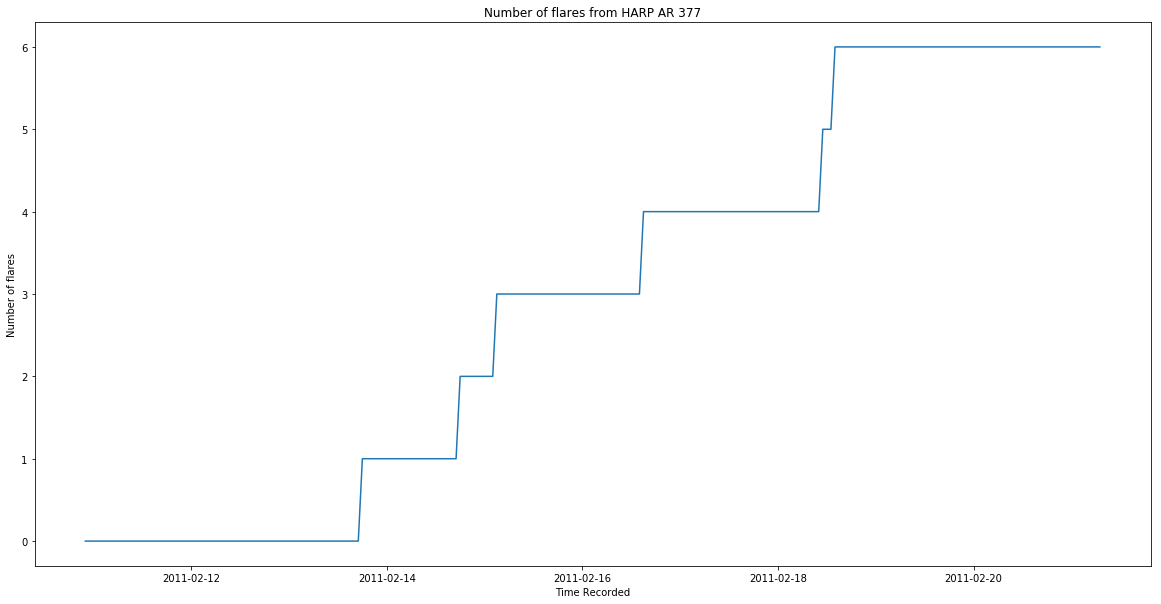

In [24]:
x = combined.loc[combined["HARPNUM"] == 377, 'T_REC']
y = combined.loc[combined["HARPNUM"] == 377, 'any_count']
plt.figure(figsize=[20,10])
plt.title("Number of flares from HARP AR 377")
plt.xlabel("Time Recorded")
plt.ylabel("Number of flares")
plt.plot(x,y)


In [26]:
numeric_data = combined.select_dtypes(include = np.number)
numeric_data.dropna(axis=1, how='all', inplace=True) # Delete any columns with only NaN values
numeric_dropna = numeric_data.dropna(0, how='any')
numeric_dropna.head()
print("Dropped {} rows with NaN values.".format(numeric_data.shape[0] - numeric_dropna.shape[0]))

/home/maha7656/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Dropped 3826 rows with NaN values.


In [27]:
flare_48h = numeric_dropna.loc[all_data['any_flare_in_48h'] != 0]
no_flare_48h = numeric_dropna.loc[all_data['any_flare_in_48h'] == 0]


In [71]:
# T test - null: there is no difference between the flare and non flare data
# The larger the t-score, the more different the groups are - indicates they might be better as features
n_nf = no_flare_48h.shape[0]
n_f = flare_48h.shape[0]
t_scores = []
for i in range(len(flare_48h.keys())):
    flare_data = flare_48h.iloc[:,i]
    no_flare_data = no_flare_48h.iloc[:,i]
    diff = flare_data.mean() - no_flare_data.mean()
    t = diff/np.sqrt(flare_data.std()**2 / n_f + no_flare_data.std()**2 / n_nf)
    t_scores.append(t)
print(t_scores)

[-14.19712691879828, -8.55202001781359, 87.16857809210248, 86.04728690372067, -54.72394631218759, -33.535901199405245, 22.37123677754084, -32.5774882125749, 95.14095936937764, 11.401121507972983, 9.433958874123192, 92.07094989802201, 73.24851296220353, 78.32884106878407, 97.48438178240052, 72.76860088772702, 99.62625324050781, 100.5196856149608, 12.045714811584153, 48.726546315012015, 50.58665595895745, 17.131616628977635, 73.0956036640717, 76.4232628989554, 24.644113367483914, 121.9410178612986, 129.6124056200083, 34.56138309203397, 567.8079143391356, inf, 9.649416250895069, 10.497060858925291, 8.71088610016213, 8.815919526653785, 8.815919526654314, 7.201174718090652, 9.558993677464132, 10.548023554357389, 8.473560805788006]


/home/maha7656/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [72]:
df = all_data.shape[0] -1 # Degrees of freedom
p_vals = []
for t in t_scores:
    p = 1-stats.t.cdf(t, df=df)
    p_vals.append(p)
    print(p) # two-tailed test

1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.992051051364797e-13
0.0
0.0
0.0


In [100]:
# print(numeric_dropna.iloc[:5, 26])
# print(numeric_dropna.dtypes)
numeric_dropna.head()

,HARPNUM,NOAA_AR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,X_flare_in_6h,M_flare_in_6h,any_flare_in_6h,X_flare_in_12h,M_flare_in_12h,any_flare_in_12h,X_flare_in_24h,M_flare_in_24h,any_flare_in_24h,X_flare_in_48h,M_flare_in_48h,any_flare_in_48h,M_count,M_average_time,M_most_recent,X_count,X_average_time,X_most_recent,any_count,any_average_time,any_most_recent
0,14,11070,2.040540e+18,82.474,38.177,27.302,40.210,0.096427,2.450419e+10,0.455411,0.000981,0.094,0.040,5.157960e+10,3116.390,1.696869e+20,49.498,60.976,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14,11070,3.406072e+20,56.375,119.260,115.744,77.247,-0.467200,6.131319e+11,-0.043184,-0.014785,28.496,9.625,2.101145e+11,4224.295,3.652143e+21,38.051,30.722,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,11070,5.640165e+20,49.561,135.720,135.401,92.320,0.725307,8.604667e+11,-0.027848,-0.012830,46.662,10.816,3.272656e+11,4652.318,5.208463e+21,33.883,20.759,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,11070,6.893843e+20,46.385,156.766,156.133,98.326,0.269859,1.099828e+12,-0.027856,-0.014201,61.789,13.406,1.363568e+11,4721.633,5.919388e+21,30.640,14.195,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,11070,6.563502e+20,44.189,170.519,173.209,106.995,1.141734,9.395849e+11,-0.038013,-0.023795,62.070,18.584,4.772939e+11,5036.524,5.223896e+21,27.010,7.939,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
data_to_scale = ['USFLUX', 'MEANGAM', 'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZD', 'TOTUSJZ', 'MEANALP', 'MEANJZH', 'TOTUSJH', 'ABSNJZH', 'SAVNCPP', 'MEANPOT', 'TOTPOT', 'MEANSHR', 'SHRGT45']
large_data = ['USFLUX', 'TOTUSJZ', 'SAVNCPP', 'TOTPOT']
numeric_dropna = numeric_data.dropna(0, how='any')

# Scale data
numeric_dropna[large_data].apply(np.log, axis=1)

for col in numeric_dropna.columns.tolist():
    if col in data_to_scale:
        numeric_dropna.loc[:,col] = scale(numeric_dropna.loc[:,col])
    else:
        numeric_data.loc[:,col] = numeric_dropna.loc[:,col] # because pandas is the worst

# numeric_dropna[data_to_scale].apply(scale, axis = 1)
numeric_dropna.head()



/home/maha7656/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/maha7656/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/maha7656/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

,HARPNUM,NOAA_AR,LAT_FWT,LON_FWT,AREA_ACR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,X_flare_in_6h,M_flare_in_6h,any_flare_in_6h,X_flare_in_12h,M_flare_in_12h,any_flare_in_12h,X_flare_in_24h,M_flare_in_24h,any_flare_in_24h,X_flare_in_48h,M_flare_in_48h,any_flare_in_48h,M_count,M_average_time,M_most_recent,X_count,X_average_time,X_most_recent,any_count,any_average_time,any_most_recent
1,14,11070,20.684654,-1.045460,15.917870,-0.753457,1.942443,0.546740,0.334566,1.744545,-1.184645,-0.710613,-1.913298,-1.996046,-0.681732,-0.402427,-0.518130,-0.178383,-0.499528,0.946824,0.785583,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,11070,20.507109,-0.913314,25.381420,-0.737671,1.246978,1.155090,1.107919,2.715313,1.156271,-0.697497,-1.222878,-1.727861,-0.663310,-0.395554,-0.500150,-0.070965,-0.494333,0.465702,0.158013,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,11070,20.496035,-0.419703,31.018440,-0.728813,0.922822,1.932934,1.923566,3.102126,0.262217,-0.684804,-1.223270,-1.915929,-0.647969,-0.380609,-0.529450,-0.053569,-0.491960,0.091355,-0.255454,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,11070,20.480949,0.125770,31.893290,-0.731147,0.698689,2.441235,2.595376,3.660447,1.973725,-0.693301,-1.680489,-3.232327,-0.647684,-0.350731,-0.477124,0.025457,-0.494281,-0.327665,-0.649520,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,14,11070,20.455782,0.687647,30.905041,-0.730816,0.653475,2.574990,2.649511,4.255351,2.359619,-0.693062,-1.431917,-2.796540,-0.644294,-0.365641,-0.463868,0.099710,-0.493375,-0.307233,-0.630119,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
combined.loc[combined["X_count"] > 0]

,HARPNUM,T_REC,NOAA_AR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,base_url,X_flare_in_6h,M_flare_in_6h,any_flare_in_6h,X_flare_in_12h,M_flare_in_12h,any_flare_in_12h,X_flare_in_24h,M_flare_in_24h,any_flare_in_24h,X_flare_in_48h,M_flare_in_48h,any_flare_in_48h,M_count,M_average_time,M_most_recent,X_count,X_average_time,X_most_recent,any_count,any_average_time,any_most_recent
16809,377,2011-02-15 03:00:00,11158,2.662004e+22,58.486,98.164,107.436,70.630,0.344269,5.610273e+13,0.041744,0.022342,3290.493,887.273,2.315949e+13,16328.8500,8.612151e+23,50.918,56.572,/SUM86/D1043269023/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,34080.0,1.0,1320.0,3240.0,3.0,1060.000000,3240.0
16810,377,2011-02-15 04:00:00,11158,2.671282e+22,59.058,97.842,106.855,70.225,0.270019,5.549581e+13,0.044175,0.023680,3235.089,949.979,2.565051e+13,16292.6500,8.680692e+23,51.269,57.412,/SUM90/D1043269340/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,37680.0,1.0,1320.0,6840.0,3.0,1060.000000,6840.0
16811,377,2011-02-15 05:00:00,11158,2.696077e+22,59.206,96.475,105.753,69.677,0.180271,5.478058e+13,0.044398,0.023223,3178.510,955.146,2.455079e+13,15906.8800,8.688730e+23,51.076,57.785,/SUM87/D1043269689/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,41280.0,1.0,1320.0,10440.0,3.0,1060.000000,10440.0
16812,377,2011-02-15 06:00:00,11158,2.686149e+22,59.021,92.458,102.006,66.588,0.231782,5.354485e+13,0.047110,0.023338,3099.510,987.217,2.438496e+13,15177.3100,8.526450e+23,51.316,58.113,/SUM93/D1043270059/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,44880.0,1.0,1320.0,14040.0,3.0,1060.000000,14040.0
16813,377,2011-02-15 07:00:00,11158,2.682620e+22,59.045,92.046,100.708,66.028,0.182483,5.411488e+13,0.046525,0.022472,3069.770,966.355,2.710220e+13,14958.4800,8.543168e+23,51.250,57.540,/SUM89/D1043270407/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,48480.0,1.0,1320.0,17640.0,3.0,1060.000000,17640.0
16814,377,2011-02-15 08:00:00,11158,2.715112e+22,58.986,93.740,103.662,66.537,0.211340,5.526784e+13,0.045110,0.022542,3172.279,966.653,2.577433e+13,15026.7000,8.557984e+23,51.260,57.066,/SUM90/D1043270788/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,52080.0,1.0,1320.0,21240.0,3.0,1060.000000,21240.0
16815,377,2011-02-15 09:00:00,11158,2.649673e+22,58.651,96.138,106.014,68.317,0.188359,5.302186e+13,0.046065,0.024285,3113.368,974.817,2.493743e+13,15690.7000,8.364973e+23,50.633,56.600,/SUM94/D1043271116/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,55680.0,1.0,1320.0,24840.0,3.0,1060.000000,24840.0
16816,377,2011-02-15 10:00:00,11158,2.640261e+22,58.628,95.893,104.720,68.909,0.179938,5.282861e+13,0.050187,0.026139,3111.821,1050.830,2.746352e+13,15521.2900,8.287443e+23,50.699,57.142,/SUM93/D1043271464/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,59280.0,1.0,1320.0,28440.0,3.0,1060.000000,28440.0
16817,377,2011-02-15 11:00:00,11158,2.615958e+22,58.539,93.880,101.854,67.710,0.153637,5.203917e+13,0.048928,0.024336,3027.739,993.462,2.516380e+13,15087.2300,8.179703e+23,50.647,57.094,/SUM88/D1043271839/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,62880.0,1.0,1320.0,32040.0,3.0,1060.000000,32040.0
16818,377,2011-02-15 12:00:00,11158,2.599979e+22,58.584,92.633,100.405,66.682,0.179412,5.255932e+13,0.050978,0.024264,3000.280,1005.777,2.659647e+13,14929.6500,8.218985e+23,50.855,57.677,/SUM90/D1043272192/S00000/,0,0,0,0,0,0,0,0,0,0,1,1,2.0,930.000000,66480.0,1.0,1320.0,35640.0,3.0,1060.000000,35640.0


In [5]:
data = pd.read_csv('finished_distance_data.csv')

data.head()

,Unnamed: 0,HARPNUM,T_REC,NOAA_AR,LAT_FWT,LON_FWT,AREA_ACR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,base_url,X_flare_in_6h,M_flare_in_6h,any_flare_in_6h,X_flare_in_12h,M_flare_in_12h,any_flare_in_12h,X_flare_in_24h,M_flare_in_24h,any_flare_in_24h,X_flare_in_48h,M_flare_in_48h,any_flare_in_48h,hc_x,hc_y,hc_z,closest_dist,connected_components_mean_thresh,total_nodes,mean_distance,flare_in_component
0,0,14,2010-05-05 03:12:00,11070,NaN,NaN,0.00000,2.040540e+18,82.474,38.177,27.302,40.210,0.096427,2.450419e+10,0.455411,0.000981,0.094,0.040,5.157960e+10,3116.390,1.696869e+20,49.498,60.976,/SUM89/D1037535115/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,14,2010-05-05 04:00:00,11070,20.684654,-1.045460,15.91787,3.406072e+20,56.375,119.260,115.744,77.247,-0.467200,6.131319e+11,-0.043184,-0.014785,28.496,9.625,2.101145e+11,4224.295,3.652143e+21,38.051,30.722,/SUM97/D1037535322/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,-11872.018458,287843.714077,633037.462958,20.576242,1.0,8.0,62.496910,True
2,2,14,2010-05-05 05:00:00,11070,20.507109,-0.913314,25.38142,5.640165e+20,49.561,135.720,135.401,92.320,0.725307,8.604667e+11,-0.027848,-0.012830,46.662,10.816,3.272656e+11,4652.318,5.208463e+21,33.883,20.759,/SUM93/D1037535533/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,-10383.617824,285833.795234,633973.658796,20.416992,1.0,8.0,62.534442,True
3,3,14,2010-05-05 06:00:00,11070,20.496035,-0.419703,31.01844,6.893843e+20,46.385,156.766,156.133,98.326,0.269859,1.099828e+12,-0.027856,-0.014201,61.789,13.406,1.363568e+11,4721.633,5.919388e+21,30.640,14.195,/SUM86/D1037535764/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,-4772.177056,285667.229696,634115.792476,20.437609,1.0,6.0,65.233606,True
4,4,14,2010-05-05 07:00:00,11070,20.480949,0.125770,31.89329,6.563502e+20,44.189,170.519,173.209,106.995,1.141734,9.395849e+11,-0.038013,-0.023795,62.070,18.584,4.772939e+11,5036.524,5.223896e+21,27.010,7.939,/SUM99/D1037536001/S00000/,0,0,0,0,0,0,0,0,0,0,0,0,1430.203374,285452.974486,634228.611732,20.351355,1.0,6.0,65.239769,True


In [6]:
# data.replace([float('inf')], np.nan)
# data.replace([np.inf], np.nan)
# data = data.dropna(subset=data.columns.values[4:23])
# data = data.dropna(subset=data.columns.values[36:])
# data= data.dropna(subset=["any_flare_in_24h"])
data=data.dropna(0, how='any')

In [46]:
data = data.reset_index(drop=True)
data.drop("Unnamed: 0", 1, inplace=True)
for i, vals in enumerate(data.columns.values):
    print(i, vals)
# data.dtypes

0 level_0
1 index
2 HARPNUM
3 T_REC
4 NOAA_AR
5 LAT_FWT
6 LON_FWT
7 AREA_ACR
8 USFLUX
9 MEANGAM
10 MEANGBT
11 MEANGBZ
12 MEANGBH
13 MEANJZD
14 TOTUSJZ
15 MEANALP
16 MEANJZH
17 TOTUSJH
18 ABSNJZH
19 SAVNCPP
20 MEANPOT
21 TOTPOT
22 MEANSHR
23 SHRGT45
24 base_url
25 X_flare_in_6h
26 M_flare_in_6h
27 any_flare_in_6h
28 X_flare_in_12h
29 M_flare_in_12h
30 any_flare_in_12h
31 X_flare_in_24h
32 M_flare_in_24h
33 any_flare_in_24h
34 X_flare_in_48h
35 M_flare_in_48h
36 any_flare_in_48h
37 hc_x
38 hc_y
39 hc_z
40 closest_dist
41 connected_components_mean_thresh
42 total_nodes
43 mean_distance
44 flare_in_component


In [15]:
print(data.shape)
#data = data.reset_index() # Fix "Data contains nan, infinite, or too-large number" error in selectK.fit()
x = np.append(np.array(data.iloc[:, 4:23]), np.array(data.iloc[:,36:40]), axis=1)
x = np.append(x, np.array(data.iloc[:,41:43]),axis=1)
labels = np.append(np.array(data.columns[4:23]), np.array(data.columns[36:40]))
labels = np.append(labels, np.array(data.columns[41:43]))
y = np.array(data.iloc[:, 32])
print(x.shape)
to_delete = []
for ind,xi in enumerate(x):
#     if np.any(np.isnan(xi)):
#         x=np.delete(x,ind,0)
#         print("removed")
    if not np.all(np.isfinite(xi)): # Fails if xi has type other than np.float, which happens if the assignment has a boolean. 
        to_delete.append(ind)
for ind in to_delete:
    x = np.delete(x,ind,0) # Delete the row if there are any infinte values
print(x.shape)

(227200, 50)
(227200, 25)


KeyboardInterrupt: 

In [50]:
x_scaled = robust_scale(x)

In [51]:
# x = np.array(numeric_dropna.iloc[:, :92])
# y = np.array(numeric_dropna.iloc[:, 103])

print(x_scaled.shape, y.shape)
selectK = SelectKBest(score_func=f_classif, k='all')
fit = selectK.fit(x_scaled,y)

print("****")
print(fit.scores_)

# labels = np.append(np.array(numeric_dropna.columns)[:18], np.array(numeric_dropna.columns)[33:])
print(labels)
best_scores, best_labels = zip(*sorted(zip(fit.scores_, labels), reverse = True))


normal_scores = []

for i in range(len(best_scores)):
    print("{} with score {}".format(best_labels[i], best_scores[i]))
    n = (best_scores[i] - best_scores[-1])/(best_scores[0]-best_scores[-1])
    normal_scores.append(n)
    if i == 9:
        print("------------------")


(215189, 25) (215189,)
****
[7.74588403e+01 2.82024449e+01 1.91594562e+02 1.66101334e+04
 2.04686585e+04 3.63024647e+03 9.38801819e+02 2.90466372e+02
 3.11981783e+02 1.28848177e+02 2.36035386e+04 1.38021111e+02
 1.36163394e+02 2.96704060e+04 2.61649984e+04 2.44538239e+04
 8.62847947e+03 2.74665723e+04 5.08344575e+03 3.12331764e+05
 1.90364172e+02 1.31014252e+01 1.65057416e+01 7.83324243e+00
 4.18588463e+01]
['NOAA_AR' 'LAT_FWT' 'LON_FWT' 'AREA_ACR' 'USFLUX' 'MEANGAM' 'MEANGBT'
 'MEANGBZ' 'MEANGBH' 'MEANJZD' 'TOTUSJZ' 'MEANALP' 'MEANJZH' 'TOTUSJH'
 'ABSNJZH' 'SAVNCPP' 'MEANPOT' 'TOTPOT' 'MEANSHR' 'any_flare_in_48h'
 'hc_x' 'hc_y' 'hc_z' 'connected_components_mean_thresh' 'total_nodes']
any_flare_in_48h with score 312331.76350449515
TOTUSJH with score 29670.406000223527
TOTPOT with score 27466.572328099253
ABSNJZH with score 26164.99843996461
SAVNCPP with score 24453.82393462382
TOTUSJZ with score 23603.538554268955
USFLUX with score 20468.658467892423
AREA_ACR with score 16610.133367151

In [36]:
c = drms.Client()

c.series(r'hmi\.m_')
si = c.info('hmi.sharp_cea_720s')

# print(si.keywords.iloc[:,0])
# si.keywords.dropna(axis=1, inplace=True)
sharp_df = si.keywords
sharp_names = np.array(sharp_df.index)
sharp_df[35:]


info = {'M_count':'Total count of previous M-class flares', 'M_average_time':'Average duration of previous M-class flares', 
 'M_most_recent':'Time since most recent M-class flare', 'X_count':'Total count of previous X-class flares', 
            'X_average_time':'Average duration of all X-class flares', 'X_most_recent':'Time since most recent X-class flare',
            'any_count':'Total count of previous flares', 'any_average_time': 'Average duration of previous flares',
            'any_most_recent':'Most recent M or X-class flare'}
for i,name in enumerate(sharp_df.index.values):
    if name in labels:
        info[name] = sharp_df.loc[name, 'note']

for i in best_labels:
    print("{} \t {}".format(i, info[i]))
                    
# info = sharp_df.loc[sharp_df.index.value in labels, 'note' ]    

TOTUSJH 	 Total unsigned current helicity
TOTUSJZ 	 Total unsigned vertical current
SAVNCPP 	 Sum of the Absolute Value of the Net Currents Per Polarity (SAVNCPP)
ABSNJZH 	 Absolute value of the net current helicity
USFLUX 	 Total unsigned flux
AREA_ACR 	 De-projected area of active pixels on sphere in micro-hemisphere
any_count 	 Total count of previous flares
M_count 	 Total count of previous M-class flares
MEANPOT 	 Mean photospheric excess magnetic energy density
X_count 	 Total count of previous X-class flares
X_average_time 	 Average duration of all X-class flares
MEANGAM 	 Mean inclination angle, gamma
M_most_recent 	 Time since most recent M-class flare
MEANGBT 	 Mean value of the total field gradient
any_most_recent 	 Most recent M or X-class flare
X_most_recent 	 Time since most recent X-class flare
MEANGBZ 	 Mean value of the vertical field gradient
MEANGBH 	 Mean value of the horizontal field gradient
LON_FWT 	 Stonyhurst longitude of flux-weighted center of active pixels
M

45
| |
42
| |
44
| |
40
| |
42
| |
40
| |


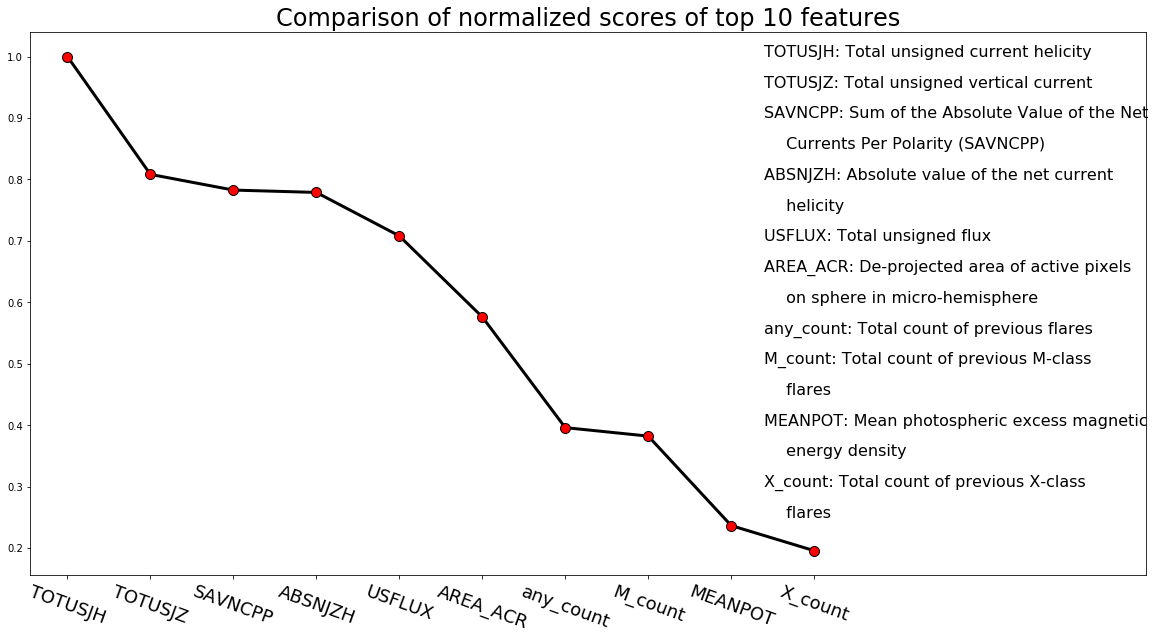

In [70]:
plt.figure(figsize=[20,10])
fs = 18
plt.plot(np.arange(len(best_scores))[:10], normal_scores[:10], 'o-', color='black', linewidth=3, ms=10, mfc='red')
plt.title("Comparison of normalized scores of top 10 features", fontsize = fs+6)
plt.xticks(np.arange(len(best_scores))[:10], best_labels[:10], fontsize = fs, rotation=-20)
plt.xlim(xmax = 13)

c = 0
e = 42
for i in range(10):
    text = "{}: {}".format(best_labels[i], info[best_labels[i]])
    
    # If the tex would go off the edge, break upon space
    if len(text) > e: 
        br_point = (text[e:].find(' ')) + e 
        if (br_point-e) == -1:
            br_point = (text.rfind(' '))
            
        print(br_point)
        print("|{}|".format(text[br_point]))
            
        plt.text(8.4, 1-(0.05*c), text[:br_point], fontsize = fs-2)
        c += 1
        plt.text(8.6, 1-(0.05*c), text[br_point:], fontsize = fs-2)
    else:
        plt.text(8.4, 1-(0.05*c), text, fontsize = fs-2)
    c += 1

plt.show()

### Correlation analysis